### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.14.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [7]:
tf.keras.utils.to_categorical(trainY,num_classes=None,dtype='float32')

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
tf.keras.utils.to_categorical(testY,num_classes=None,dtype='float32')

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
('First 5 examples now are: ', array([9, 0, 0, 3, 0], dtype=uint8))


In [0]:
import matplotlib.pyplot as plt

### Visualize the data

Plot first 10 images in the triaining set and their labels.

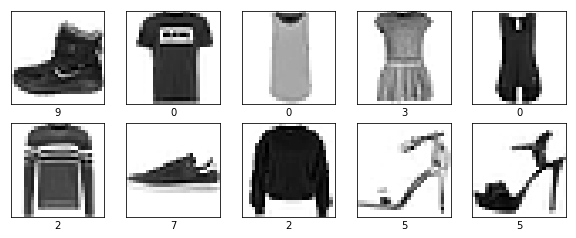

In [20]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])
plt.show()


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [27]:
trainX.shape

(60000, 28, 28)

In [0]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [0]:
model1.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [37]:
model1.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 14.4944 - acc: 0.1006
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 14.5063 - acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 14.5063 - acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 14.5063 - acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 14.5063 - acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 14.5063 - acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 14.5063 - acc: 0.1000
Epoch 8/10
60000/60000 [==============================] - 2s 37us/step - loss: 14.5063 - acc: 0.1000
Epoch 9/10
60000/60000 [==============================] - 2s 37us/step - loss: 14.5063 - acc: 0.1000
Epoch 10/10
60000/60000 [==============================] - 2s 37us/step - loss: 14.5063 - a

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

In [0]:
model2 = keras.Sequential()

In [0]:
model2.add(Flatten())

In [0]:
model2.add(Dense(10, input_dim=26,kernel_initializer='normal', activation='relu'))

In [0]:
model2.add(BatchNormalization())

In [0]:
model2.add(Dense(10, kernel_initializer='normal',activation='relu'))

In [0]:
model2.add(Dense(10, kernel_initializer='normal'))

In [0]:
model2.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [63]:
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 2.5473 - acc: 0.1088
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 2.3026 - acc: 0.1091
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 2.3026 - acc: 0.1090
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1089
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1090
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1091
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1088
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1087
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1089
Epoch 10/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1088

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
model2.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 2.3026 - acc: 0.1088
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1085
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 2.3026 - acc: 0.1088
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1085
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1093
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1086
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 2.3026 - acc: 0.1086
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1088
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1092
Epoch 10/10
60000/60000 [==============================] - 3s 43us/step - loss: 2.3026 - acc: 0.1093

In [67]:
score=model2.evaluate(testX,testY)

10000/10000 [==============================] - 0s 32us/step


In [68]:
score

[2.3107664222717283, 0.1054]

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
from keras.layers import Activation, Dense

In [0]:
model4 = keras.Sequential()
model4.add(Flatten())
model4.add(Dense(26, input_dim=26,activation='relu', kernel_initializer='normal'))
model4.add(Dense(100, activation="sigmoid", kernel_initializer='normal'))
model4.add(Dense(100, activation="sigmoid", kernel_initializer='normal'))
model4.add(Dense(10, activation="sigmoid", kernel_initializer='normal'))
model4.add(Dense(10, activation='softmax'))
# Compile model
opt4 = keras.optimizers.SGD(lr=0.03, momentum=0.9, decay=0.0)
model4.compile(optimizer=opt4,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [116]:
model4.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 57us/step - loss: 1.8091 - acc: 0.2788
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 2.1771 - acc: 0.1359
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 2.0074 - acc: 0.1835
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 2.1005 - acc: 0.1520
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 2.3085 - acc: 0.1014
Epoch 6/10
60000/60000 [==============================] - 3s 52us/step - loss: 2.3089 - acc: 0.0996
Epoch 7/10
60000/60000 [==============================] - 3s 50us/step - loss: 2.3092 - acc: 0.0989
Epoch 8/10
60000/60000 [==============================] - 3s 50us/step - loss: 2.3085 - acc: 0.1006
Epoch 9/10
60000/60000 [==============================] - 3s 50us/step - loss: 2.3094 - acc: 0.0985
Epoch 10/10
60000/60000 [==============================] - 3s 51us/step - loss: 2.3092 - acc: 0.1001

## Review model

In [0]:
X = tf.concat([trainX,testX],0)
Y = tf.concat([trainY,testY],0)

In [89]:
X.shape

TensorShape([Dimension(70000), Dimension(28), Dimension(28)])

In [90]:
Y.shape

TensorShape([Dimension(70000)])

In [112]:
test_loss, test_acc = model4.evaluate(testX, testY)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 38us/step
('Test accuracy:', 0.1001)


### Run the model

In [0]:
predictions = model4.predict(testX)

In [114]:
predictions

array([[0.09517145, 0.08614016, 0.10738324, ..., 0.09524558, 0.0826159 ,
        0.11802983],
       [0.09517145, 0.08614016, 0.10738324, ..., 0.09524558, 0.0826159 ,
        0.11802983],
       [0.09517145, 0.08614016, 0.10738324, ..., 0.09524558, 0.0826159 ,
        0.11802983],
       ...,
       [0.09517145, 0.08614016, 0.10738324, ..., 0.09524558, 0.0826159 ,
        0.11802983],
       [0.09517145, 0.08614016, 0.10738324, ..., 0.09524558, 0.0826159 ,
        0.11802983],
       [0.09517145, 0.08614016, 0.10738324, ..., 0.09524558, 0.0826159 ,
        0.11802983]], dtype=float32)